<h1 style="font-size: 3em;">Algoritmo de agrupamiento CK-Means</h1>  

# 0) Marco teórico

### 0.1) Introducción: _Clustering_ y problema de particionamiento

El _clustering_ es una técnica de aprendizaje no supervisado cuyo objetivo es agrupar datos en subconjuntos homogéneos, de forma que los elementos que queden ubicados dentro de un mismo grupo sean más similares entre sí que con los elementos de otros grupos.  

En particular, los algoritmos de _clustering_ de tipo particionamiento dividen un conjunto de **N** datos en **k** grupos que son disjuntos entre sí.  

Para estudiar la similitud entre los datos, se pueden utilizar distintos criterios, siendo uno de los más conocidos y empleados el que se basa en la distancia euclidiana. &nbsp;En los métodos de particionamiento, esta distancia se utiliza para definir una función objetivo global, conocida como SSE _(Sum of Squared Errors)_, la cual cuantifica la dispersión _intra-cluster_, y que se define matemáticamente como:

##### $$SSE = \sum_{j=1}^k \sum_{x_{i} \in C_{j}} (x_{i} - \mu_{j})^2$$   
en donde $C_{j}$ representa el conjunto de elementos del cluster $j$ junto a su centroide $\mu_{j}$.  




### 0.2) Algoritmo de _clustering_ K-Means (clásico)

El algoritmo **K-means** es uno de los métodos de _clustering_ más conocidos y utilizados.  Su funcionamiento se basa en un proceso que consta de dos partes: la inicialización de los centroides de cada _cluster_ (suelen generarse aleatoriamente), y el posterior subproceso iterativo que alterna dos pasos fundamentales:  

1. Asignación: Cada dato (observación) se asigna al _cluster_ cuyo centroide esté más cercano según la distancia euclidiana.  
2. Actualización: Los centroides se recalculan como la media de los puntos asignados a cada _cluster_.  

Este procedimiento se repite hasta que las asignaciones dejen de cambiar o se alcance un criterio de convergencia definido.  Si bien **K-means** es computacionalmente eficiente y no muy difícil de implementar, presenta una importante limitación, que es que la solución depende bastante de la inicialización de los centroides que se hace al inicio, lo cual puede hacer que no siempre se obtenga un particionamiento óptimo de los datos.  

Esta limitación se vuelve especialmente importante cuando los datos son de carácter unidimensional, en donde el problema de particionamiento sí admite soluciones óptimas y exactas.

#### **Pseudocódigo de K-Means (ejemplo en 1 dimensión)**
Aclaración: Es solo un pseudocódigo y no está hecho con el fin de ser funcional, sino que solo con el fin de mostrar cómo trabaja internamente el algoritmo.
```javascript
/**
 * @param list Lista con los datos.
 * @param k Nro de clusters.
**/
function k-means(data as list, k as integer):

    // Contador de interaciones
    iter as static integer = 0
    
    // Creación de centroides y grupos
    centroides = listObject(size=k, init=zeros())
    grupos = listObject(size=k, init=classObject(atributes=[.centroide=0, .datos=newEmptyListObject()]))  

    // Inicialización aleatoria del primer centroide
    centroides[0] = random(range(list.minvalue(), list.maxvalue()))
    grupos[0].setCentroide(centroides[0])

    // Inicialización aleatoria de los otros centroides
    for i in range(1, k, includeLower=true, includeUpper=false):
        do:
            centroides[i] = random(range(list.minvalue(), list.maxvalue()))
        while:
            centroides[i] in centroides
        grupo[i].setCentroide(centroides[i])

    do:
        if iter != 0:
            old_sse = sum(sum((x-x.grupo.centroide())^2) for x in grupo, for grupo in grupos)

        else:
            old_sse = 0  // Por defecto

        // Limpieza de los datos de los grupos
        for grupo in grupos:
            grupo.datos.clear()
            
        // Asignación a distintos clusters
        for x in data:
            minDistance = +infinity
            bestGroup = None
            for grupo in grupos:
                distance = abs(x - grupo.getCentroide())
                if distance < min_distance:
                    minDistance = distance
                    bestGroup = grupo
            bestGroup.addDato(x)
    
        // Actualización de centroides
        for grupo in grupos:
            grupo.setCentroide(grupo.datos.mean())
        
        iter++
    
    while:
        abs(sum(sum((x-x.grupo.centroide())^2) for x in grupo, for grupo in grupos) - old_sse)/old_sse > 0.05

    return grupos

### 0.3) Algoritmo de _clustering_ CK-Means en una dimensión

CK-Means es un algoritmo de _clustering_ que es una variante optimizada del clásico algoritmo de agrupamiento de K-Means cuando los datos son unidimensionales.  

En este algoritmo, primero se ordenan los datos, y luego mediante programación dinámica, se halla la segmentación óptima de los datos, tratándolos como si los mismos estuviesen ubicados en una recta numérica.  

A diferencia de K-means clásico, CK-means 1D:  

* No depende de centroides iniciales. 
* No utiliza un proceso iterativo de asignación-actualización. 
* No incorpora aleatoriedad. 
* Garantiza la solución globalmente óptima respecto a la función objetivo SSE.  

Formalmente, el problema se expresa como:  

##### $$\min_{C_{1},...,C_{k}} \sum_{j=1}^k SSE(C_{j})$$

sujeto a que cada $C_{j}$ sea un intervalo contiguo de los datos ordenados.

Una vez determinada la partición óptima, los centroides se calculan a posteriori como la media de cada intervalo.

#### **Pseudocódigo de CK-Means**
Aclaración: Es solo un pseudocódigo
``` javascript
/**
 * CK-means (1D) por Programación Dinámica
 * @param data Lista con los datos (1D).
 * @param k Nro de clusters.
**/
function ckmeans(data as list, k as integer):

    // Precondición: CK-means en 1D requiere ordenar los datos
    dataSorted = sort(data, ascending=true)

    // Número de datos a particionar en clusters
    n = dataSorted.size()

    // Preparación de las sumas acumuladas para calcular SSE(i,j)
    S1 = listObject(size=n+1, init=zeros())
    S2 = listObject(size=n+1, init=zeros())

    S1[0] = 0
    S2[0] = 0

    // Se calculan las sumas acumuladas
    for t in range(1, n+1, includeLower=true, includeUpper=false):
        x = dataSorted[t-1]
        S1[t] = S1[t-1] + x
        S2[t] = S2[t-1] + x^2

    // SSE de un segmento contiguo.  Fórmula: SSE(i,j) = sum(x^2) - (sum(x)^2)/m, con m = (j-i+1)
    function sse_segment(i as integer, j as integer):
        sum_x  = S1[j] - S1[i-1]
        sum_x2 = S2[j] - S2[i-1]
        m = (j - i + 1)
        return sum_x2 - (sum_x)^2/m

    // Se crea la tabla en la cual se almacenarán los resultados de SSE de cada segmento (Sum of Squared Errors)
    sse_table = matrixObject(size=(n+1, n+1), init=zeros())

    // Se calcula la suma de errores cuadráticos para cada segmento
    for i in range(1, n, includeLower=true, includeUpper=true):
        for j in range(i+1, n, includeLower=true, includeUpper=true):
            sse_table[i][j] = sse_segment(i, j)
    
    // Tabla para los valores de DP
    dp_table = matrixObject(size=(k+1, n+1), init=(-1, +infinity))
    
    // Función  para calcular el costo total mediante la fórmula recursiva
    function dp(r as integer, j as integer):
        if dp_table[r][j].y() != infinity:
            return dp_table[r][j]

        if r==j:
            return (j, 0)

        if r==1:
            return (1, sse_table[1][j])

        candidates = newEmptyListObject()

        for i in range(r, j, includeLower=true, includeUpper=true):
            prevCost = dp(r-1, i-1).y()
            candidate = prevCost + sse_table[i][j]
            candidates.addVectorObject(dimensions=2, content=(i, candidate))
        
        min = +infinity
        position = -1

        for index, value in candidates:
            if value < min:
                position = index
                min = value
        
        return position, min
        
    // Cálculo de los valores de DP e inserción en la tabla
    for r in range(1, k, includeLower=true, includeUpper=true)
        for j in range(r, n, includeLower=true, includeUpper=true)
            dp_table[r][j] = dp(r, j)

    clusteredList = listObject(size=k, init=newEmptyListObject())
    
    end = n

    for r in range(k, 1, step=-1):
        start = dp_table[r][end].x()
        
        for idx in range(start, end, includeLower=true, includeUpper=true):
            clusteredList[r-1].addData(dataSorted[idx-1])

        end = start - 1

    for idx in range(1, end, includeLower=true, includeUpper=true):
        clusteredList[0].addData(dataSorted[idx-1])

    centroides = listObject(size=k, init=zeros())

    for i in range(0, k, includeLower=true, includeUpper=false)
        centroides[i] = clusteredList[i].mean()

    return clusteredList, centroides
```


### 0.4) Ejemplo teórico de CK-Means (resuelto a mano para entender paso a paso el algoritmo)

Supongamos que tenemos los siguientes datos no agrupados:  

${1, 4, 5, -2, 0, 7}$

Y queremos dividir este conjunto pequeño de 6 datos, en 3 _clusters_, empleando CK-Means.

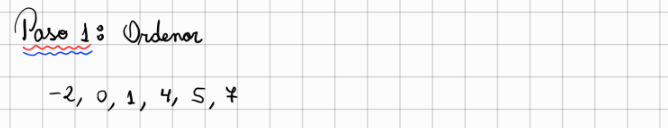

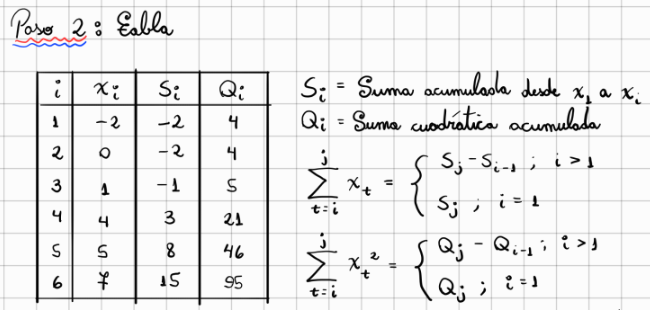

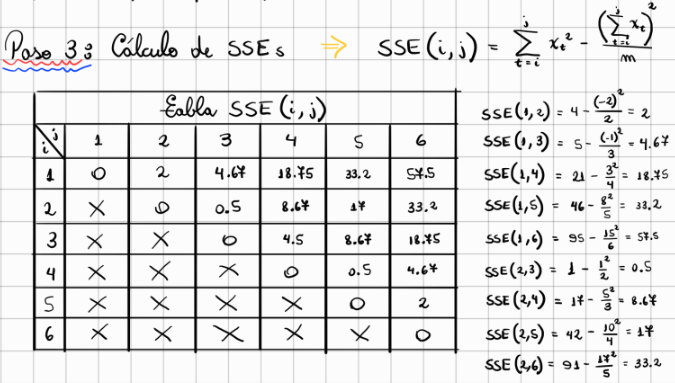

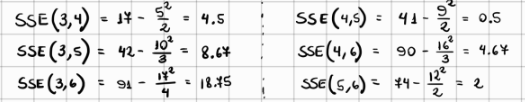

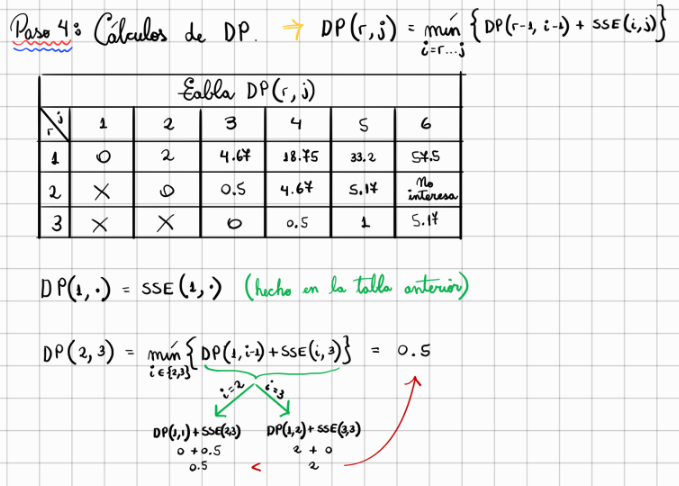

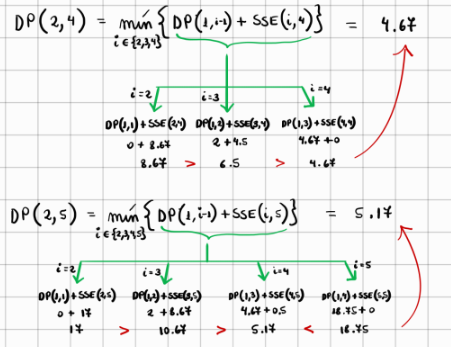

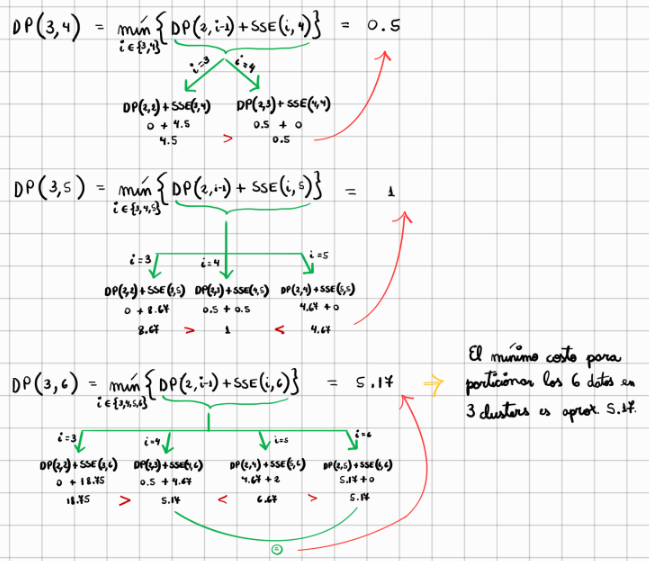

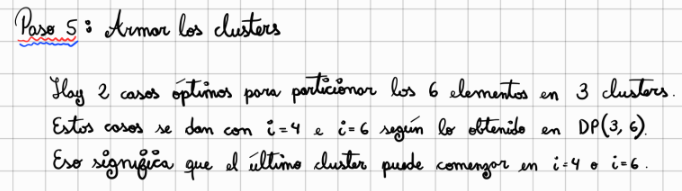

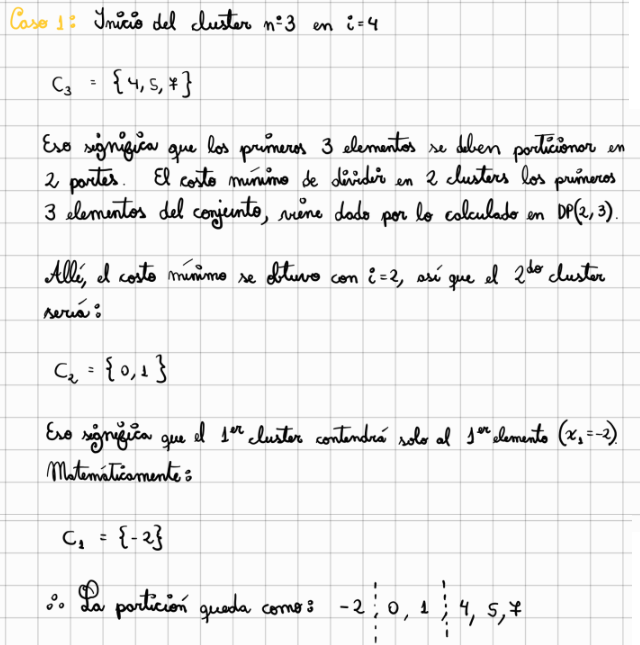

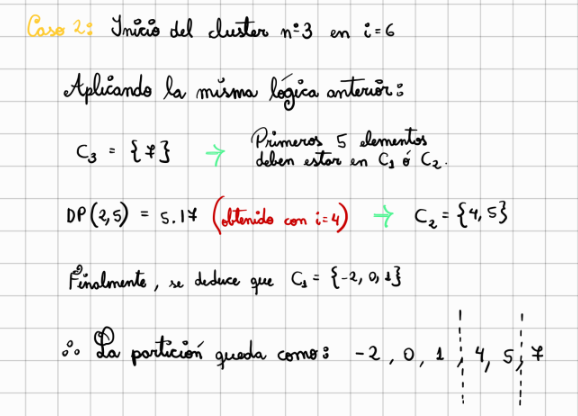


Como se pudo observar en el ejemplo resuelto a mano, hay 2 particiones igual de óptimas.  La que sea escogida depende de cómo se programe el algoritmo.

# 1) Parte práctica - Ejemplo 1

Se tienen los siguientes datos (25 en total)  

${28, 35, 74, 17, 40, 96, 15, 32, 22, 153, 85, 42, 211, 26, 55, 13, 52, 45, 196, 31, 116, 44, 29, 78, 24}$

Suponiendo que corresponden a distintos índices de calidad del aire (AQI), particionar de la forma más óptima esos valores en 4 _clusters_.  Intuitivamente, el significado será:

* _Cluster_ 1: AQIs saludable  
* _Cluster_ 2: AQIs aceptable  
* _Cluster_ 3: AQI malo  
* _Cluster_ 4: AQI muy malo  


### 1.1) Importación de librerías necesarias

Para realizar el proceso de _clustering_ en este ejemplo inventado, se emplearán las librerías `pandas`, `matplotlib` y `ckmeans`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ckmeans import ckmeans

### 1.2) Definir el arreglo con los datos a particionar

In [2]:
AQI_data = [28, 35, 74, 17, 40, 96, 15, 32, 22, 153, 85, 42, 211, 26, 55, 13, 52, 45, 196, 31, 116, 44, 29, 78, 24]

### 1.3) Transformar la lista en un _"PyArray"_ de la librería `numpy`

Sin este paso previo, la función `ckmeans` daría error de tipo.

In [3]:
AQI_data_np = np.array(AQI_data, dtype=np.float64)

### 1.4) Aplicarle CK-Means al _"PyArray"_ (ya viene implementado CK-Means en la librería `ckmeans`)

**Aclaración:** Si bien CK-Means ya viene implementado en la librería mencionada y hace todo internamente (incluido el ordenamiento inicial), igual fue importante entender en qué consistía el algoritmo y por eso se hizo toda una sección teórica previa. 

In [4]:
nro_clusters = 4
AQI_clusters = ckmeans(AQI_data_np, nro_clusters)
display(AQI_clusters)

[array([13., 15., 17., 22., 24., 26., 28., 29., 31., 32., 35., 40., 42.,
        44., 45., 52., 55.]),
 array([74., 78., 85., 96.]),
 array([116., 153.]),
 array([196., 211.])]

Así, como se puede observar, los _clusters_ de los datos de AQI _(Air Quality Index)_ quedaron formados de la siguiente forma:  

* _Cluster_ 1: $13, 15, 17, 22, 24, 26, 28, 29, 31, 32, 35, 40, 42, 44, 45, 52, 55$
* _Cluster_ 2: $74, 78, 85, 96$
* _Cluster_ 3: $116, 153$
* _Cluster_ 4: $196, 211$

### 1.5) Analizar el resultado obtenido y obtener más información a partir de lo obtenido


#### 1.5.1) Análisis de recuento de datos por _cluster_

In [5]:
analysis_clustering_AQIs_df = pd.DataFrame()

analysis_clustering_AQIs_df["Nro. de cluster"] = [1, 2, 3, 4]
analysis_clustering_AQIs_df["Recuento de datos"] = [len(c) for c in AQI_clusters]
analysis_clustering_AQIs_df["Concentración de datos"] = (analysis_clustering_AQIs_df["Recuento de datos"] * 100 / len(AQI_data)).round(1).astype(str) + "%"
analysis_clustering_AQIs_df

,Nro. de cluster,Recuento de datos,Concentración de datos
0,1,17,68.0%
1,2,4,16.0%
2,3,2,8.0%
3,4,2,8.0%


Como se puede observar, el _cluster_ 1 es el que concentra la mayor cantidad de datos por lejos, ya que concentra casi el 70% de los datos, mientras los demás en promedio contienen apenas alrededor de un 10% de los datos.  Esto de todos modos, es bastante esperado, porque el _dataset_ tenía una mayor densidad de valores bajos que valores altos.

#### 1.5.2) Análisis de dispersión por _cluster_  
Aquí se analizará qué tanta dispersión hay en cada cluster, con medidas como el rango, la desviación estándar, y el SSE (función objetivo de CK-Means).

In [6]:
centroides = [round(np.mean(c), 2) for c in AQI_clusters]
sse_clusters = [round(sum((x - centroides[i])**2 for x in c), 2) for i, c in enumerate(AQI_clusters)]

analysis_clustering_AQIs_df["Centroide"] = centroides
analysis_clustering_AQIs_df["Rango"] = [int(max(c)-min(c)) for c in AQI_clusters]
analysis_clustering_AQIs_df["Desviación estándar"] = [round(np.std(c), 2) for c in AQI_clusters]
analysis_clustering_AQIs_df["SSE"] = sse_clusters
analysis_clustering_AQIs_df["SSE por dato"] = (sse_clusters / analysis_clustering_AQIs_df["Recuento de datos"]).round(2)

analysis_clustering_AQIs_df

,Nro. de cluster,Recuento de datos,Concentración de datos,Centroide,Rango,Desviación estándar,SSE,SSE por dato
0,1,17,68.0%,32.35,42,12.16,2513.88,147.88
1,2,4,16.0%,83.25,22,8.35,278.75,69.69
2,3,2,8.0%,134.50,37,18.50,684.50,342.25
3,4,2,8.0%,203.50,15,7.50,112.50,56.25


Como se puede observar, el _cluster_ 1 y el _cluster_ 3 presentan los mayores valores de SSE, lo que indica una mayor dispersión total de los datos.  No obstante, el _cluster_ 1 es el más poblado, por lo que su mayor SSE está influenciado por la cantidad de observaciones.  Al normalizar esta medida mediante el SSE por dato y considerar la desviación estándar, se observa que el cluster 3 presenta una mayor dispersión _intracluster_, siendo el menos compacto de los _clusters_ obtenidos.

### 1.6) Visualización de _clusters_ (con librería `matplotlib`)

#### 1.6.1) Visualización de recuento por _cluster_

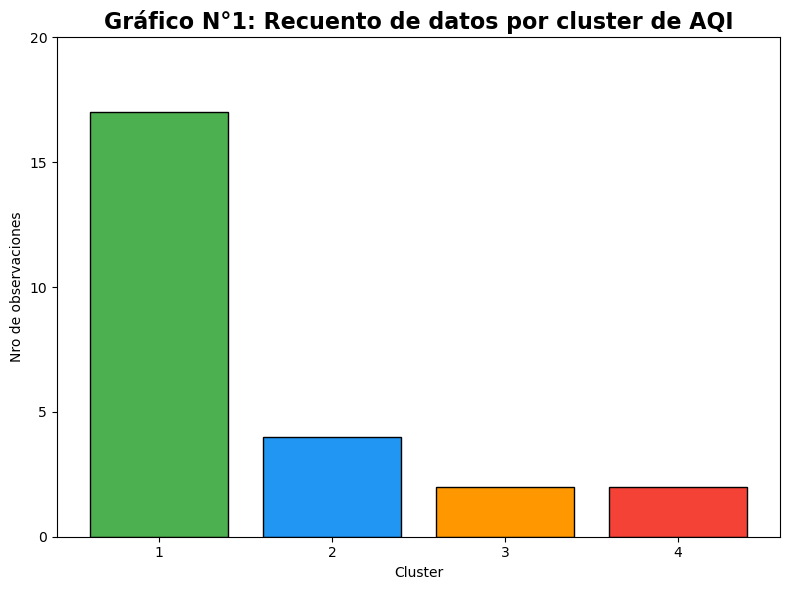

In [7]:
plt.figure(figsize=(8, 6))

AQI_clusters_ids = analysis_clustering_AQIs_df["Nro. de cluster"]
counts = analysis_clustering_AQIs_df["Recuento de datos"]
colors = ["#4CAF50", "#2196F3", "#FF9800", "#F44336"]

bars = plt.bar(AQI_clusters_ids, counts, color=colors, edgecolor="black")

plt.xticks(AQI_clusters_ids)
plt.yticks(range(0, 21, 5))
plt.ylim(0, 20)

plt.xlabel("Cluster")
plt.ylabel("Nro de observaciones")

plt.title("Gráfico N°1: Recuento de datos por cluster de AQI", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

#### 1.6.2) Visualización de _clusters_

In [8]:
cuts = []

for i in range(len(AQI_clusters) - 1):
    a = AQI_clusters[i][-1]
    b = AQI_clusters[i+1][0]
    cuts.append((np.array([a, b]).mean()))

print("Límites (umbrales): ", cuts)


Límites (umbrales):  [np.float64(64.5), np.float64(106.0), np.float64(174.5)]


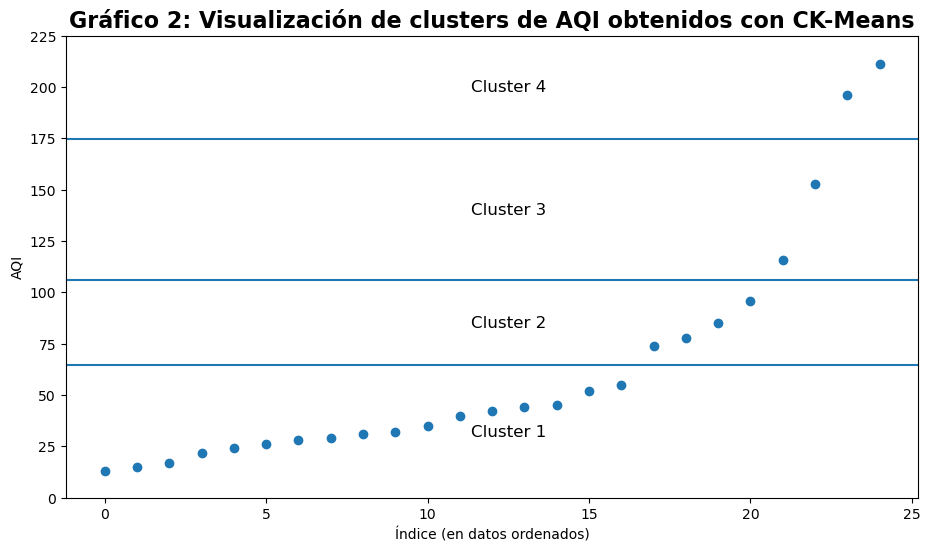

In [9]:
AQI_data_sorted = np.sort(AQI_data_np)

plt.figure(figsize=(11,6))
plt.plot(AQI_data_sorted, marker='o', linestyle='')

AQI_top_lim = 226

plt.yticks(range(0, AQI_top_lim, 25))

prev_cut = 0
iter = 1

for cut in cuts:
    plt.axhline(cut)
    plt.text(12.5, (prev_cut+cut)/2, "Cluster " + str(iter), ha="center", va="center", fontsize=12)
    prev_cut = cut
    iter += 1

cut = AQI_top_lim
plt.text(12.5, (prev_cut+cut)/2, "Cluster " + str(iter), ha="center", va="center", fontsize=12)

plt.title("Gráfico 2: Visualización de clusters de AQI obtenidos con CK-Means", fontsize=16, fontweight="bold")

plt.xlabel("Índice (en datos ordenados)")
plt.ylabel("AQI")
plt.show()


# 2) Parte práctica - Ejemplo 2

Para este ejemplo se usará el _dataset_ que está en el archivo `made_up_blood_presure_data.csv`.  Ese _dataset_ pequeño que se utilizará en este ejemplo fue inventado con datos ficticios de presión arterial de 15 personas.  Este ejemplo será un poco más desafiante que el anterior, ya que es un dataset en que cada ejemplo consta de 2 componentes; presión sistólica y presión diastólica, por lo tanto no son datos unidimensionales, y requieren técnicas de reducción de dimensionalidad previa como **PCA** antes de aplicar **CK-Means**.  

### 2.1) Importación de librerías

Para este ejemplo se emplearán también las mismas 4 librerías utilizadas en el ejemplo anterior, pero además se importará la función `Ellipse` presente en el paquete `patches` de la librería `matplotlib`, la función `StandardScaler` presente en el paquete `preprocessing` de la librería `sklearn` y la función `PCA` presente en el paquete `decompoosition` de la misma librería.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from ckmeans import ckmeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 2.2) Carga y muestra del _dataset_

In [11]:
blood_pressure_data = pd.read_csv("made_up_blood_presure_data.csv")
blood_pressure_data

,Persona,Presión sistólica,Presión diastólica
0,Ana,139,84
1,Pedro,128,92
2,Kevin,117,78
3,Julieta,126,85
4,Héctor,149,97
5,Tamara,142,88
6,Norberto,174,105
7,Olivia,107,59
8,Gerardo,126,70
9,Camila,130,82


### 2.3) Descripción básica del _dataset_

In [12]:
blood_pressure_data_size = blood_pressure_data.shape
blood_pressure_data_size

(15, 3)

In [13]:
blood_pressure_data.dtypes

Persona               object
Presión sistólica      int64
Presión diastólica     int64
dtype: object

Como se puede observar, el _dataset_ contiene 15 ejemplos, y 3 descriptores, que son el nombre de la persona, su presión sistólica y su presión diastólica, pero para hacer el _clustering_ solo se utilizarán los 2 descriptores numéricos relacionados a la presión arterial.  

### 2.4) Estadísticas resumidas del _dataset_ y matriz de correlación

#### 2.4.1) Estadísticas resumidas del _dataset_

A continuación se muestra una tabla con las estadísticas para cada componente de la presión arterial del _dataset_-

In [14]:
summary = blood_pressure_data.describe().T
summary = summary.round({
    "mean": 2,
    "std": 1,
    "min": 1,
    "25%": 1,
    "50%": 1,
    "75%": 1,
    "max": 1
})
summary["count"] = summary["count"].astype(int)
summary

,count,mean,std,min,25%,50%,75%,max
Presión sistólica,15,136.00,18.1,107.0,125.5,130.0,145.5,174.0
Presión diastólica,15,83.27,12.7,59.0,77.5,84.0,91.0,105.0


#### 2.4.2) Matriz de correlación

Se verificará que haya cierto nivel de correlación entre la presión sistólica y la presión diastólica para asegurar que tenga sentido reducir la dimensionalidad.

In [49]:
corr_matrix = blood_pressure_data[["Presión sistólica", "Presión diastólica"]].corr().round(2)
corr_matrix


,Presión sistólica,Presión diastólica
Presión sistólica,1.00,0.76
Presión diastólica,0.76,1.00


La matriz de correlación obtenida confirma que la presión sistólica y la presión diastólica presentan una relación positiva considerable. Si bien dicha correlación no es perfecta, el valor observado (ρ = 0.76) es suficientemente alto como para indicar un grado relevante de dependencia entre ambas variables. Esto sugiere la existencia de información parcialmente redundante, lo que justifica la aplicación de técnicas de reducción de dimensionalidad como PCA.

### 2.5) Preparación de datos para PCA (paso previo a _clustering_ con CK-Means)

#### 2.5.1) Conversión de los datos de presión en una matriz `numpy`

In [17]:
# Se seleccionan las columnas de interés del dataset y se convierten en una matriz numpy de 15x2 (cada columna corresponde a la presión arterial de un paciente)
blood_pressure_values = blood_pressure_data[["Presión sistólica", "Presión diastólica"]].values
blood_pressure_values

array([[139,  84],
       [128,  92],
       [117,  78],
       [126,  85],
       [149,  97],
       [142,  88],
       [174, 105],
       [107,  59],
       [126,  70],
       [130,  82],
       [162,  90],
       [155,  80],
       [120,  64],
       [140,  98],
       [125,  77]])

#### 2.5.2) Creación del objeto matemático que normaliza las columnas

Aquí se crea con la función `StandardScaler()`, un objeto matemático que lo que hace es aplicar una transformación del tipo:  

##### $$z = \frac{x-\mu}{\sigma}$$

In [18]:
scaler = StandardScaler()

##### 2.5.3) Se aplica la transformación a las columnas

Esto se hace empleando el objeto creado junto con la función `fit_transform`.  Luego de hacer eso, la matriz queda estandarizada, con media 0 y desviación estándar 1 en cada columna.

In [19]:
blood_pressure_zscore_values = scaler.fit_transform(blood_pressure_values)
blood_pressure_zscore_values

array([[ 0.17149859,  0.05999742],
       [-0.45732956,  0.71451475],
       [-1.08615771, -0.43089057],
       [-0.57166195,  0.14181209],
       [ 0.74316054,  1.12358808],
       [ 0.34299717,  0.38725609],
       [ 2.17231541,  1.77810541],
       [-1.65781966, -1.98536923],
       [-0.57166195, -1.0854079 ],
       [-0.34299717, -0.10363191],
       [ 1.48632107,  0.55088542],
       [ 1.08615771, -0.26726124],
       [-0.91465912, -1.5762959 ],
       [ 0.22866478,  1.20540274],
       [-0.62882815, -0.51270524]])

### 2.6) PCA para reducción de dimensionalidad

Sin este paso previo aún no se puede aplicar _clustering_ con CK-Means.  

Se hará PCA con 2 componentes, pero solo la primera componente principal (PC1) será la que se empleará para CK-Means, ya que CK-Means trabaja para datos unidimensionales.  La segunda se ocupará únicamente para analizar la varianza explicada junto con la primera componente también.

#### 2.6.1) Aplicación de PCA a los datos

In [20]:
# PCA para 2 componentes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(blood_pressure_zscore_values)
X_pca

array([[ 0.1636924 , -0.07884323],
       [ 0.18185739,  0.82861906],
       [-1.07271513,  0.46334383],
       [-0.30394975,  0.50450233],
       [ 1.3199906 ,  0.2690029 ],
       [ 0.51636703,  0.03129578],
       [ 2.79336935, -0.27874857],
       [-2.57612356, -0.23161252],
       [-1.17172533, -0.36327325],
       [-0.31581445,  0.1692568 ],
       [ 1.44052252, -0.66145289],
       [ 0.57904724, -0.95701172],
       [-1.76137118, -0.46784785],
       [ 1.01403887,  0.69065804],
       [-0.807186  ,  0.08211129]])

#### 2.6.2) Extracción de las componentes

In [21]:
# Extracción de la primera componente
pc1 = X_pca[:, 0]
print("PC1:\n")
display(pc1)

print("\n\n")

# Extracción de la segunda componente
pc2 = X_pca[:, 1]
print("PC2:\n")
display(pc2)

PC1:



array([ 0.1636924 ,  0.18185739, -1.07271513, -0.30394975,  1.3199906 ,
        0.51636703,  2.79336935, -2.57612356, -1.17172533, -0.31581445,
        1.44052252,  0.57904724, -1.76137118,  1.01403887, -0.807186  ])




PC2:



array([-0.07884323,  0.82861906,  0.46334383,  0.50450233,  0.2690029 ,
        0.03129578, -0.27874857, -0.23161252, -0.36327325,  0.1692568 ,
       -0.66145289, -0.95701172, -0.46784785,  0.69065804,  0.08211129])

#### 2.6.3) Análisis de varianza explicada

Esta parte es para asegurarse de que la reducción de dimensionalidad a 1 componente (para hacer CK-Means se requiere solo una), no implicará mucha pérdida de variabilidad de los datos.

In [22]:
print("Varianza explicada por componente:")

for i, v in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {v:.2%}")

Varianza explicada por componente:
PC1: 88.06%
PC2: 11.94%


### 2.7) Aplicación de CK-Means

Ahora ya está todo preparado para el proceso de _clustering_ con CK-Means.  Se harán 3 _clusters_, de modo que representen lo siguiente:

* _Cluster_ 1: Presiones arteriales bajas.
* _Cluster_ 2: Presiones arteriales moderadas (normales).
* _Cluster_ 3: Presiones arteriales altas.

In [23]:
pc1 = np.array(pc1, dtype=float)
idx = np.arange(len(pc1))

order = np.argsort(pc1, kind="mergesort")

pc1_sorted = pc1[order]
idx_sorted = idx[order]

In [24]:
nro_clusters = 3

pc1_clusters = ckmeans(pc1, nro_clusters)
pc1_clusters

[array([-2.57612356, -1.76137118, -1.17172533, -1.07271513, -0.807186  ]),
 array([-0.31581445, -0.30394975,  0.1636924 ,  0.18185739,  0.51636703,
         0.57904724]),
 array([1.01403887, 1.3199906 , 1.44052252, 2.79336935])]

### 2.8) Reconstrucción para identificar personas según los valores de la componente principal

Para saber a qué persona corresponde cada observación dentro de los _clusters_ de PC1, se añaden dos nuevas columnas al DataFrame original `blood_pressure_data`:

* **PC1**: Almacena el valor de la primera componente principal de cada persona.
* **Cluster**: indica el número de _cluster_ asignado a cada persona.

A continuación se muestra el código que realiza esta reconstrucción paso a paso:

In [25]:
# En people amount se almacena la cantidad de personas y en people_clusters, los clusters que serán asignados a las personas
people_amount = len(pc1)
people_clusters = [0] * people_amount

# Reconstrucción de datos: Asignación de cluster y PC1 a cada persona
position = 0                # Posición en el PC1 ordenado
current_cluster_id = 1      # Identificador del cluster actual (1, 2 ó 3)

# Cluster es una lista de valores de PC1 que se debe recorrer valor por valor
for cluster in pc1_clusters:
    for pc1_value in cluster:
        person_id = idx_sorted[position]    # Aquí se encuentra a qué persona correspondía
        people_clusters[person_id] = current_cluster_id   # Se hace la asignación de cluster
        position += 1   # Se avanza al siguiente PC1
    
    current_cluster_id += 1     # Luego de recorrer todo, se pasa al siguiente cluster

blood_pressure_data["PC1"] = pc1
blood_pressure_data["Cluster"] = people_clusters
blood_pressure_data

,Persona,Presión sistólica,Presión diastólica,PC1,Cluster
0,Ana,139,84,0.163692,2
1,Pedro,128,92,0.181857,2
2,Kevin,117,78,-1.072715,1
3,Julieta,126,85,-0.303950,2
4,Héctor,149,97,1.319991,3
5,Tamara,142,88,0.516367,2
6,Norberto,174,105,2.793369,3
7,Olivia,107,59,-2.576124,1
8,Gerardo,126,70,-1.171725,1
9,Camila,130,82,-0.315814,2


### 2.9) Análisis por _cluster_

Ahora que ya están los datos reconstruidos, se hará un análisis estadístico básico por _cluster_.

#### 2.9.1) Análisis de recuento y concentración de datos por _cluster_

In [26]:
analysis_clustering_blood_pressure_df = pd.DataFrame()

analysis_clustering_blood_pressure_df["Nro. de cluster"] = [1, 2, 3]
analysis_clustering_blood_pressure_df["Recuento de datos"] = [len(c) for c in pc1_clusters]
analysis_clustering_blood_pressure_df["Concentración de datos"] = (analysis_clustering_blood_pressure_df["Recuento de datos"] * 100 / people_amount).round(1).astype(str) + "%"
analysis_clustering_blood_pressure_df

,Nro. de cluster,Recuento de datos,Concentración de datos
0,1,5,33.3%
1,2,6,40.0%
2,3,4,26.7%


Esta pequeño _dataframe_ muestra que los datos de presión arterial, a diferencia del primer ejemplo, se distribuyen de forma mucho más pareja entre los _clusters_.  Ya que ninguno de los 3 _clusters_ posee ni menos del 25% de los datos ni tampoco más del 40%.

#### 2.9.2) Filtrado del dataset por _cluster_ (para facilitar el análisis restante)

In [28]:
blood_pressure_c1_data = blood_pressure_data[blood_pressure_data["Cluster"] == 1].drop(columns=["Cluster"]).sort_values(by="PC1", kind="mergesort")
blood_pressure_c1_data

,Persona,Presión sistólica,Presión diastólica,PC1
7,Olivia,107,59,-2.576124
12,Gustavo,120,64,-1.761371
8,Gerardo,126,70,-1.171725
2,Kevin,117,78,-1.072715
14,Verónica,125,77,-0.807186


In [29]:
blood_pressure_c2_data = blood_pressure_data[blood_pressure_data["Cluster"] == 2].drop(columns=["Cluster"]).sort_values(by="PC1", kind="mergesort")
blood_pressure_c2_data

,Persona,Presión sistólica,Presión diastólica,PC1
9,Camila,130,82,-0.315814
3,Julieta,126,85,-0.303950
0,Ana,139,84,0.163692
1,Pedro,128,92,0.181857
5,Tamara,142,88,0.516367
11,Angélica,155,80,0.579047


In [30]:
blood_pressure_c3_data = blood_pressure_data[blood_pressure_data["Cluster"] == 3].drop(columns=["Cluster"]).sort_values(by="PC1", kind="mergesort")
blood_pressure_c3_data

,Persona,Presión sistólica,Presión diastólica,PC1
13,Eleodoro,140,98,1.014039
4,Héctor,149,97,1.319991
10,Felipe,162,90,1.440523
6,Norberto,174,105,2.793369


In [31]:
minidatasets = [blood_pressure_c1_data, blood_pressure_c2_data, blood_pressure_c3_data]

In [32]:
blood_pressure_clusters = [[], [], []]

blood_pressure_c1_values = blood_pressure_c1_data[["Presión sistólica", "Presión diastólica"]].values
blood_pressure_c2_values = blood_pressure_c2_data[["Presión sistólica", "Presión diastólica"]].values
blood_pressure_c3_values = blood_pressure_c3_data[["Presión sistólica", "Presión diastólica"]].values

for par in blood_pressure_c1_values:
    blood_pressure_clusters[0].append(tuple(par.astype(int)))

for par in blood_pressure_c2_values:
    blood_pressure_clusters[1].append(tuple(par))

for par in blood_pressure_c3_values:
    blood_pressure_clusters[2].append(tuple(par))


print("Cluster 1: ")
display(blood_pressure_clusters[0])

print("Cluster 2:")
display(blood_pressure_clusters[1])

print("Cluster 3:")
display(blood_pressure_clusters[2])


Cluster 1: 


[(np.int64(107), np.int64(59)),
 (np.int64(120), np.int64(64)),
 (np.int64(126), np.int64(70)),
 (np.int64(117), np.int64(78)),
 (np.int64(125), np.int64(77))]

Cluster 2:


[(np.int64(130), np.int64(82)),
 (np.int64(126), np.int64(85)),
 (np.int64(139), np.int64(84)),
 (np.int64(128), np.int64(92)),
 (np.int64(142), np.int64(88)),
 (np.int64(155), np.int64(80))]

Cluster 3:


[(np.int64(140), np.int64(98)),
 (np.int64(149), np.int64(97)),
 (np.int64(162), np.int64(90)),
 (np.int64(174), np.int64(105))]

#### 2.9.3) Análisis estadístico básico por _cluster_ (especialmente dispersión)

In [33]:
centroides = [0] * nro_clusters
centroides

[0, 0, 0]

In [34]:
c1_summary = blood_pressure_c1_data.describe().T
c2_summary = blood_pressure_c2_data.describe().T
c3_summary = blood_pressure_c3_data.describe().T

centroides = [tuple(c1_summary["mean"][:-1].round(1)), tuple(c2_summary["mean"][:-1].round(1)), tuple(c3_summary["mean"][:-1].round(1))]
analysis_clustering_blood_pressure_df["Centroide"] = centroides
analysis_clustering_blood_pressure_df

sistolic_ranges = [c1_summary["max"].iloc[0] - c1_summary["min"].iloc[0], 
                   c2_summary["max"].iloc[0] - c2_summary["min"].iloc[0], 
                   c3_summary["max"].iloc[0] - c3_summary["min"].iloc[0]]

diastolic_ranges = [c1_summary["max"].iloc[1] - c1_summary["min"].iloc[1], 
                    c2_summary["max"].iloc[1] - c2_summary["min"].iloc[1], 
                    c3_summary["max"].iloc[1] - c3_summary["min"].iloc[1]]

analysis_clustering_blood_pressure_df["Rango sistólica"] = sistolic_ranges
analysis_clustering_blood_pressure_df["Rango diastólica"] = diastolic_ranges
analysis_clustering_blood_pressure_df["Desviación estándar sistólica"] = [c1_summary["std"].iloc[0].round(2), c2_summary["std"].iloc[0].round(2), c3_summary["std"].iloc[0].round(2)]
analysis_clustering_blood_pressure_df["Desviación estándar diastólica"] = [c1_summary["std"].iloc[1].round(2), c2_summary["std"].iloc[1].round(2), c3_summary["std"].iloc[1].round(2)]

sistolic_variances = analysis_clustering_blood_pressure_df["Desviación estándar sistólica"] ** 2
diastolic_variances = analysis_clustering_blood_pressure_df["Desviación estándar diastólica"] ** 2

analysis_clustering_blood_pressure_df["SSE sistólica"] = sistolic_variances * [minidatasets[i].shape[0] for i in range(nro_clusters)]
analysis_clustering_blood_pressure_df["SSE diastólica"] = diastolic_variances * [minidatasets[i].shape[0] for i in range(nro_clusters)]
analysis_clustering_blood_pressure_df["SSE sistólica por dato"] = sistolic_variances
analysis_clustering_blood_pressure_df["SSE diastólica por dato"] = diastolic_variances 

analysis_clustering_blood_pressure_df


,Nro. de cluster,Recuento de datos,Concentración de datos,Centroide,Rango sistólica,Rango diastólica,Desviación estándar sistólica,Desviación estándar diastólica,SSE sistólica,SSE diastólica,SSE sistólica por dato,SSE diastólica por dato
0,1,5,33.3%,"(119.0, 69.6)",19.0,19.0,7.65,8.20,292.6125,336.2000,58.5225,67.2400
1,2,6,40.0%,"(136.7, 85.2)",29.0,12.0,10.98,4.31,723.3624,111.4566,120.5604,18.5761
2,3,4,26.7%,"(156.2, 97.5)",34.0,15.0,14.89,6.14,886.8484,150.7984,221.7121,37.6996


La tabla obtenida muestra que si bien el _cluster_ n°3 tiene una cantidad ligeramente menor de datos en comparación con los otros _clusters_ presenta una mayor dispersión en cuanto a la componente sistólica de la presión, lo que muestra que no siempre más datos implica más variabilidad o dispersión.  En cuanto a la componente diastólica de la presión, el _cluster_ que presenta una mayor dispersión o variabilidad en sus datos es el primero.  Además, se observa que en general, la presión sistólica presenta una mayor dispersión que la presión diastólica.

### 2.10) Visualización de _clusters_ (con librería `matplotlib`)

#### 2.10.1) Visualización de recuento por _cluster_

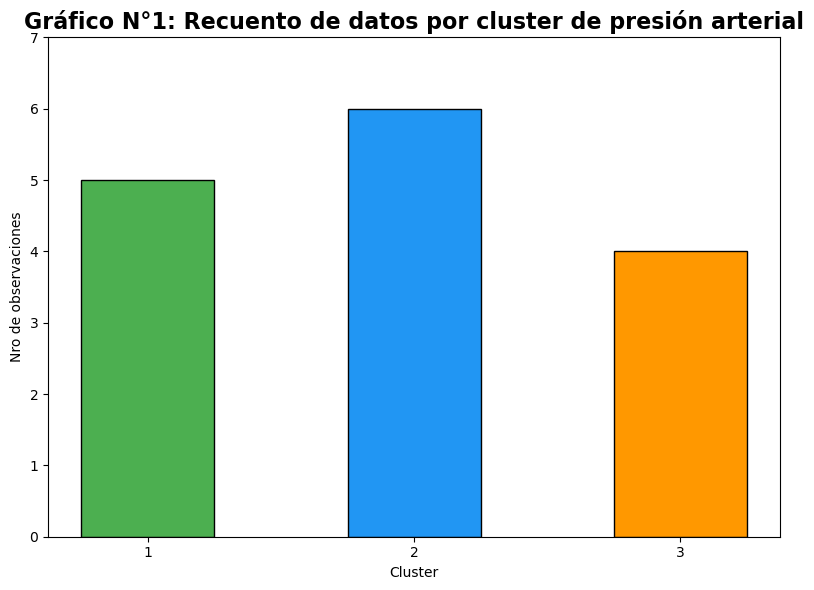

In [37]:
plt.figure(figsize=(8, 6))

blood_pressure_clusters_ids = analysis_clustering_blood_pressure_df["Nro. de cluster"]
counts = analysis_clustering_blood_pressure_df["Recuento de datos"]
colors = ["#4CAF50", "#2196F3", "#FF9800", "#F44336"]

bars = plt.bar(blood_pressure_clusters_ids, counts, color=colors, edgecolor="black", width=0.5)

plt.xticks(blood_pressure_clusters_ids)
plt.yticks(range(0, 8, 1))

plt.xlabel("Cluster")
plt.ylabel("Nro de observaciones")

plt.title("Gráfico N°1: Recuento de datos por cluster de presión arterial", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

#### 2.10.2) Visualización de _clusters_

In [44]:
display(minidatasets)

[     Persona  Presión sistólica  Presión diastólica       PC1
 7     Olivia                107                  59 -2.576124
 12   Gustavo                120                  64 -1.761371
 8    Gerardo                126                  70 -1.171725
 2      Kevin                117                  78 -1.072715
 14  Verónica                125                  77 -0.807186,
      Persona  Presión sistólica  Presión diastólica       PC1
 9     Camila                130                  82 -0.315814
 3    Julieta                126                  85 -0.303950
 0        Ana                139                  84  0.163692
 1      Pedro                128                  92  0.181857
 5     Tamara                142                  88  0.516367
 11  Angélica                155                  80  0.579047,
      Persona  Presión sistólica  Presión diastólica       PC1
 13  Eleodoro                140                  98  1.014039
 4     Héctor                149                  97 

In [ ]:
frontlines = tuple(((blood_pressure_clusters[i][-1][0] + blood_pressure_clusters[i+1][0][0])/2, (blood_pressure_clusters[i][-1][1] + blood_pressure_clusters[i+1][0][1])/2) for i in range(nro_clusters - 1))
frontlines

((np.float64(127.5), np.float64(79.5)), (np.float64(147.5), np.float64(89.0)))

In [101]:
depression_angle = 45  # Las rectas de separación se harán con un ángulo de depresión de 45°
tg_depression_angle = np.tan(np.radians(depression_angle))

x1 = np.arange(90.0, 160.0, 1)
y1 = -tg_depression_angle * x1 + (tg_depression_angle*frontlines[0][0] + frontlines[0][1])

x2 = np.arange(100.0, 190.0, 1)
y2 = -tg_depression_angle * x2 + (tg_depression_angle*frontlines[1][0] + frontlines[1][1])



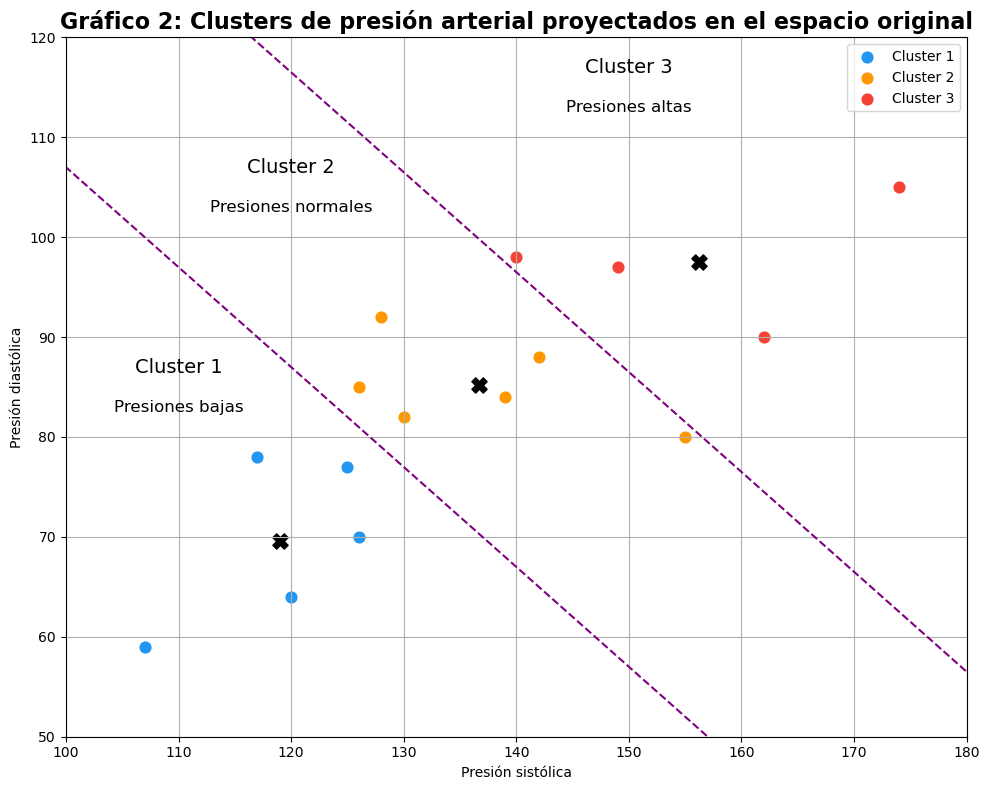

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

for cluster_id in sorted(blood_pressure_data["Cluster"].unique()):
    
    cluster_data = blood_pressure_data[
        blood_pressure_data["Cluster"] == cluster_id
    ]
    
    x = cluster_data["Presión sistólica"].values
    y = cluster_data["Presión diastólica"].values
    
    ax.scatter(
        x, y,
        color=colors[cluster_id],
        label=f"Cluster {cluster_id}",
        s=60
    )

for centroide in centroides:
    ax.scatter(centroide[0], centroide[1], color="black", marker="X", s=120)

ax.plot(x1, y1, linestyle="--", color="purple")
ax.plot(x2, y2, linestyle="--", color="purple")

ax.set_xlim(left=100, right=180)
ax.set_ylim(bottom=50, top=120)

ax.text(110, 87, "Cluster 1", fontsize=14, ha="center", va="center")
ax.text(110, 83, "Presiones bajas", fontsize=12, ha="center", va="center")
ax.text(120, 107, "Cluster 2", fontsize=14, ha="center", va="center")
ax.text(120, 103, "Presiones normales", fontsize=12, ha="center", va="center")
ax.text(150, 117, "Cluster 3", fontsize=14, ha="center", va="center")
ax.text(150, 113, "Presiones altas", fontsize=12, ha="center", va="center")

ax.set_xlabel("Presión sistólica")
ax.set_ylabel("Presión diastólica")
ax.set_title("Gráfico 2: Clusters de presión arterial proyectados en el espacio original", fontsize=16, fontweight="bold")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()